## Basic imports 

In [1]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

## Plot power spectrum with varying Neff 
## - this is to verify Barry is able to get power spectrum with varying Neff 

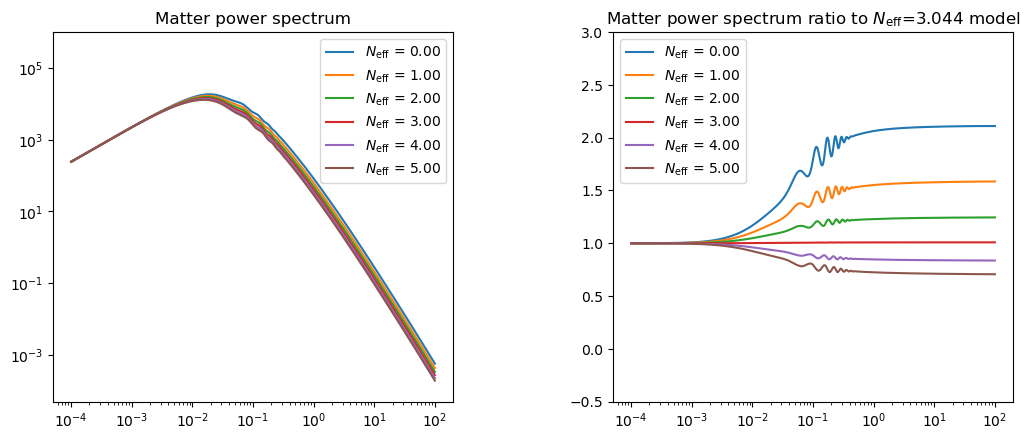

In [18]:
from barry.models import PowerBeutler2017
#from barry.datasets.dataset_power_spectrum import PowerSpectrum_DESI_KP4

# Set up the appropriate model for the power spectrum

model = PowerBeutler2017(
    vary_neff=True,
    isotropic=True,
    n_poly=6,
) # setting up choice for BAO model 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
k = model.camb.ks

#model.camb._generate_data() # - only needs to be run one time to calculate power spectrum at varying Neff 


ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

#ax1.set_xlim(2e-4, 100)
#ax2.set_xlim(2e-4, 100)

ax1.set_ylim(5e-5, 1e6)
ax2.set_ylim(-0.5, 3)


ax1.set_title("Matter power spectrum")
ax2.set_title(r"Matter power spectrum ratio to $N_{\mathrm{eff}}$=3.044 model")

pk_3044 = model.camb.get_data(cosmology["om"], Neff=3.044)

for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]:
    
    pk = model.camb.get_data(cosmology["om"], Neff=i) # interpolates for desired Neff and returns power spectrum data 
    # (only works as long as self.cab._generate_data() has been run) 
    
    ax1.loglog(k, pk['pk_lin'], label=r"$N_{\mathrm{eff}}$ = %.2f" % i)
    
    ax2.semilogx(k, pk['pk_lin']/pk_3044['pk_lin'], label="$N_{\mathrm{eff}}$ = %.2f" % i)
    
plt.subplots_adjust(wspace=0.4, left=0, right=1.5)    
ax1.legend()
ax2.legend()


## Plot the BAO model for 
## - smoothed power spectrum 
## - wiggles 
## with the varying choices of Neff 

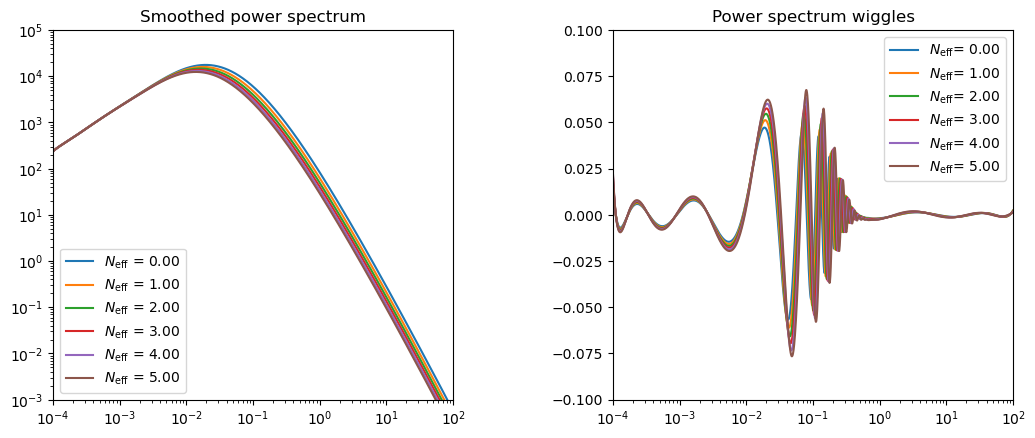

In [19]:
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax2.set_xlim(1e-4, 100)
ax1.set_xlim(1e-4, 100)

ax2.set_ylim(-0.1, 0.1)
ax1.set_ylim(1e-3, 1e5)


for i in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]:
    
    #pk, 
    pksmooth, pkwiggles = model.compute_basic_power_spectrum(cosmology["om"], Neff=i) # interpolates for desired Neff and returns power spectrum data 
    # (only works as long as self.cab._generate_data() has been run) 
    ax1.loglog(k, pksmooth, label=r"$N_{\mathrm{eff}}$ = %.2f" % i)
    
    ax2.semilogx(k, pkwiggles, label=r"$N_{\mathrm{eff}}$= %.2f" % i)
    #ax2.loglog(k, pk)
    
ax1.set_title('Smoothed power spectrum')
ax2.set_title('Power spectrum wiggles')
plt.subplots_adjust(wspace=0.4, left=0, right=1.5)   
ax1.legend()
ax2.legend()

## Plot the full power spectrum model moments for the BAOs, with Neff varying for generating different cosmologies 

Beutler et al 2017 power spectrum model, recomputed with varying Neff


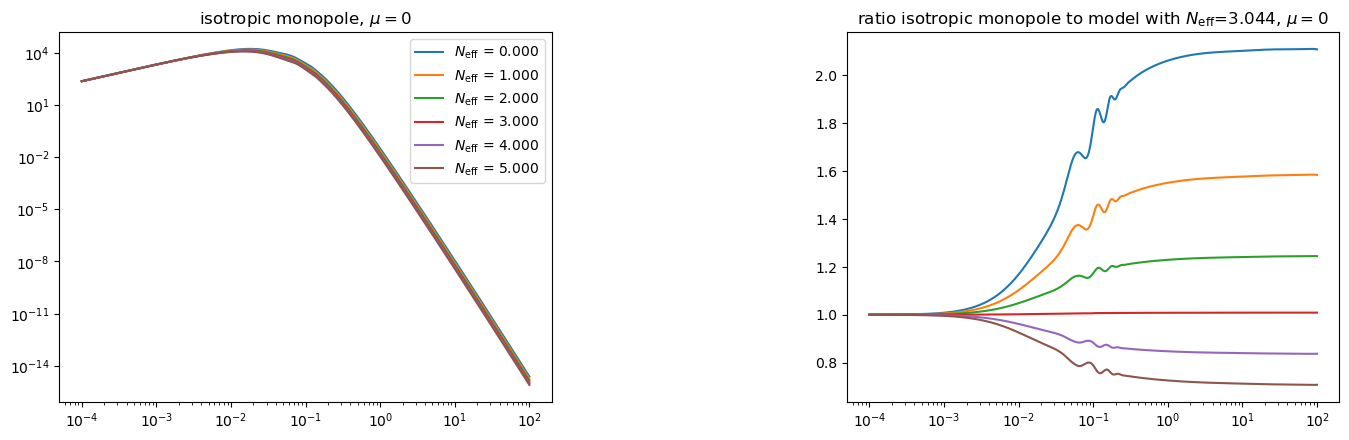

In [36]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

from barry.models import PowerBeutler2017

model = PowerBeutler2017(
    vary_neff=True,
    isotropic=True,
    #poly_poles=[0],
    n_poly=6,
) # setting up choice for BAO model - now isotropic model for plotting 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
ks = model.camb.ks
params_dict = {j.name: j.default for j in model.params}

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

params_dict["Neff"] = 3.044
k, pk1, poly = model.compute_power_spectrum(ks, params_dict)

for neff in [0., 1.0, 2.0, 3.0, 4.0, 5.0]:

    model.pksmooth = None 
    model.pkratio = None
    
    params_dict["Neff"] = neff
    k, pk, poly = model.compute_power_spectrum(ks, params_dict, vary_neff=True)
    
    ax1.loglog(k, pk[0], label=r"$N_{\mathrm{eff}}$ = %.3f" % neff)
    ax2.semilogx(k, pk[0]/pk1[0], label=r"$N_{\mathrm{eff}}$ = %.3f" % neff)
    
    

print("Beutler et al 2017 power spectrum model, recomputed with varying Neff")
ax1.set_title(r'isotropic monopole, $\mu = 0$')
ax2.set_title(r'ratio isotropic monopole to model with $N_{\mathrm{eff}}$=3.044, $\mu = 0$')
plt.subplots_adjust(wspace=0.6, left=0, right=2)
ax1.legend()
plt.show()

Beutler et al 2017 power spectrum model, recomputed with varying Neff


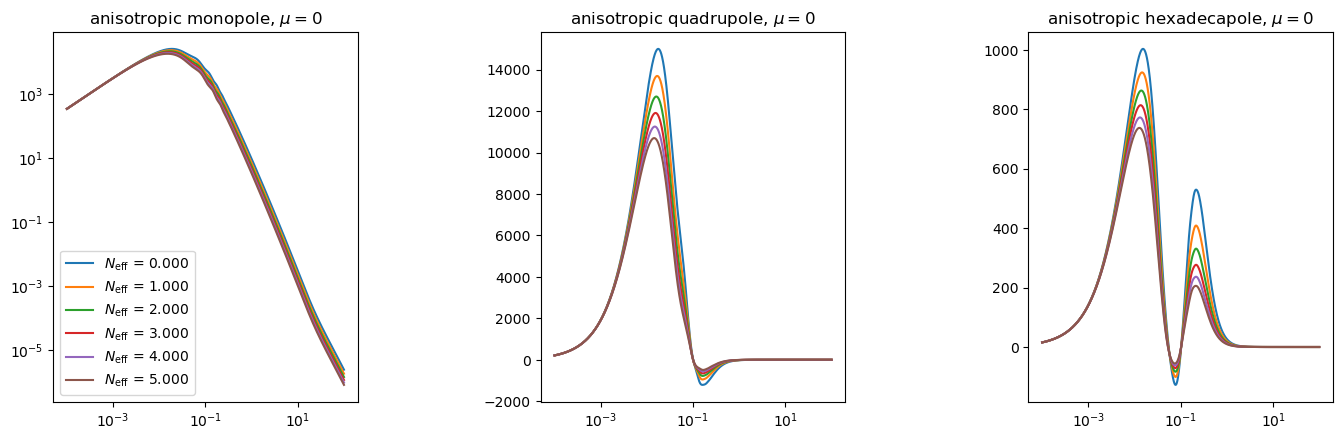

In [37]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

from barry.models import PowerBeutler2017

model = PowerBeutler2017(
    vary_neff=True,
    isotropic=False,
    #poly_poles=[0],
    n_poly=6,
) # setting up choice for BAO model - now anisotropic model for plotting 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
ks = model.camb.ks
params_dict = {j.name: j.default for j in model.params}
params_dict['beta'] = 0.525

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for neff in [0., 1.0, 2.0, 3.0, 4.0, 5.0]:

    model.pksmooth = None 
    model.pkratio = None
    
    params_dict["Neff"] = neff
    k, pk, poly = model.compute_power_spectrum(ks, params_dict, vary_neff=True)
    
    ax1.loglog(k[:,0], pk[0], label=r"$N_{\mathrm{eff}}$ = %.3f" % neff)
    ax2.semilogx(k[:,0], pk[2], label=r"$N_{\mathrm{eff}}$ = %.3f" % neff)
    ax3.semilogx(k[:,0], pk[4], label=r"$N_{\mathrm{eff}}$ = %.3f" % neff)
    

print("Beutler et al 2017 power spectrum model, recomputed with varying Neff")
ax1.set_title(r'anisotropic monopole, $\mu = 0$')
ax2.set_title(r'anisotropic quadrupole, $\mu = 0$')
ax3.set_title(r'anisotropic hexadecapole, $\mu = 0$')
plt.subplots_adjust(wspace=0.6, left=0, right=2)
ax1.legend()
plt.show()

## Keep a constant value for Neff when generating Beutler 2017 power spectrum model with CAMB but vary the phase shift parameter for Neff and plot the models

Beutler et al 2017 power spectrum model, recomputed with varying Neff phase shift parameter beta


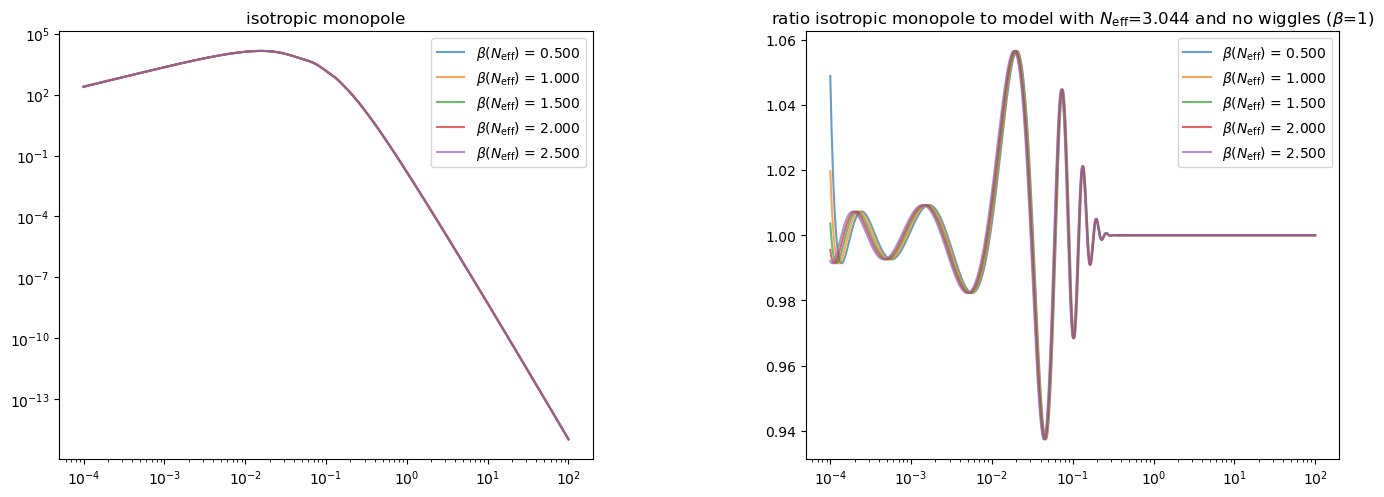

In [1]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

from barry.models import PowerBeutler2017

model = PowerBeutler2017(
    isotropic=True,
    vary_phase_shift_neff=True,
    #poly_poles=[0],
    n_poly=6,
) # setting up choice for BAO model - isotropic model for plotting 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
ks = model.camb.ks
params_dict = {j.name: j.default for j in model.params}

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

params_dict["beta_phase_shift"] = 1.0
k, pk1, poly = model.compute_power_spectrum(ks, params_dict, smooth=True)

for phase_shift_parameter in [0.5, 1.0, 1.5, 2.0, 2.5]:

    params_dict["beta_phase_shift"] = phase_shift_parameter
    k, pk, poly = model.compute_power_spectrum(ks, params_dict)
    
    ax1.loglog(k, pk[0], label=r"$\beta(N_{\mathrm{eff}})$ = %.3f" % phase_shift_parameter, alpha=0.7)
    ax2.semilogx(k, pk[0]/pk1[0], label=r"$\beta(N_{\mathrm{eff}})$ = %.3f" % phase_shift_parameter, alpha=0.7)
    
   

print("Beutler et al 2017 power spectrum model, recomputed with varying Neff phase shift parameter beta")
ax1.set_title('isotropic monopole')
ax2.set_title(r'ratio isotropic monopole to model with $N_{\mathrm{eff}}$=3.044 and no wiggles ($\beta$=1)')
plt.subplots_adjust(wspace=0.4, left=0, right=2, top=1)
ax1.legend()
ax2.legend()
plt.show() 

Beutler et al 2017 power spectrum model, recomputed with varying Neff phase shift parameter beta


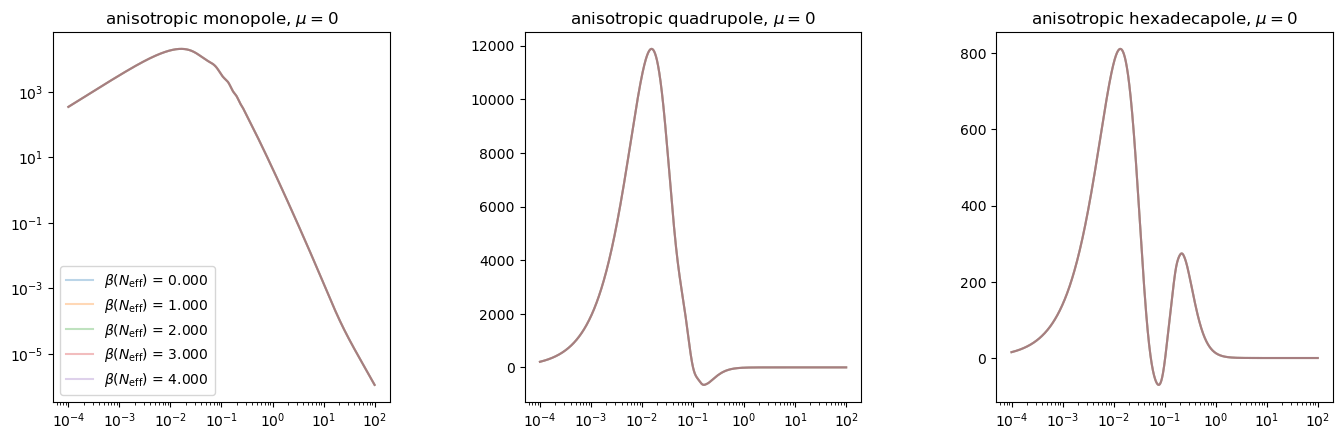

In [24]:
import sys 
sys.path.append("../")
import barry 
import numpy as np
import matplotlib.pyplot as plt 

from barry.models import PowerBeutler2017

model = PowerBeutler2017(
    isotropic=False,
    vary_phase_shift_neff=True,
    n_poly=6,
) # setting up choice for BAO model - anisotropic model for plotting 

cosmology = {
            "om": 0.31,
            "h0": 0.67,
            "z":  0.51,
            "ob": 0.048,
            "ns": 0.97,
            "mnu": 0.0,
            "reconsmoothscale": 15,
            "Neff": 3.044,
        }
model.set_cosmology(cosmology) # initialises self.camb object 
ks = model.camb.ks
params_dict = {j.name: j.default for j in model.params}
params_dict['beta'] = 0.525

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)

for phase_shift_parameter in [0., 1.0, 2.0, 3.0, 4.0]:

    params_dict["beta_phase_shift"] = phase_shift_parameter
    k, pk, poly = model.compute_power_spectrum(ks, params_dict)
    
    ax1.loglog(k[:,0], pk[0], label=r"$\beta(N_{\mathrm{eff}})$ = %.3f" % phase_shift_parameter, alpha=0.3)
    ax2.semilogx(k[:,0], pk[2], label=r"$\beta(N_{\mathrm{eff}})$ = %.3f" % phase_shift_parameter, alpha=0.3)
    ax3.semilogx(k[:,0], pk[4], label=r"$\beta(N_{\mathrm{eff}})$ = %.3f" % phase_shift_parameter, alpha=0.3)
    

print(r'Beutler et al 2017 power spectrum model, recomputed with varying Neff phase shift parameter beta')
ax1.set_title(r'anisotropic monopole, $\mu = 0$')
ax2.set_title(r'anisotropic quadrupole, $\mu = 0$')
ax3.set_title(r'anisotropic hexadecapole, $\mu = 0$')
plt.subplots_adjust(wspace=0.4, left=0, right=2)
ax1.legend()
plt.show() 